<a href="https://colab.research.google.com/github/navaneeth-das/-CODSOFT/blob/main/Movie_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [197]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [198]:
df=pd.read_csv('/content/drive/MyDrive/bigdata/codsoft/IMDb Movies India.csv.zip',encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [200]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [201]:
df.shape

(15509, 10)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [203]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [204]:
df.duplicated().sum()

6

In [205]:
df.drop_duplicates(inplace=True)

In [206]:
df.duplicated().sum()

0

In [207]:
df.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [208]:
drop=['Year','Director','Actor 1','Actor 2','Actor 3','Genre',]
df.dropna(subset=drop,inplace=True)
df.isna().sum()

Name           0
Year           0
Duration    4641
Genre          0
Rating      3527
Votes       3526
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [209]:
#removing units
df['Duration']=df['Duration'].str.replace(' min','')
df['Year']=df['Year'].str.replace('[()]','')
df['Votes']=df['Votes'].str.replace('[,$M]','')
df


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15502,Zulm Ki Pukar,1979,NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [210]:
df['Duration']=df['Duration'].astype(float)
df['Rating']=df['Rating'].astype(float)
df['Votes']=df['Votes'].astype(float)
df['Year']=df['Year'].astype(int)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15502,Zulm Ki Pukar,1979,NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,1989,125.0,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11085 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11085 non-null  object 
 1   Year      11085 non-null  int64  
 2   Duration  6444 non-null   float64
 3   Genre     11085 non-null  object 
 4   Rating    7558 non-null   float64
 5   Votes     7559 non-null   float64
 6   Director  11085 non-null  object 
 7   Actor 1   11085 non-null  object 
 8   Actor 2   11085 non-null  object 
 9   Actor 3   11085 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 952.6+ KB


In [212]:
df['Rating'].fillna(df['Rating'].mode()[0],inplace=True)
df['Duration'].fillna(df['Duration'].mean(),inplace=True)
df['Votes'].fillna(df['Votes'].mean(),inplace=True)
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

Text(0, 0.5, 'Name')

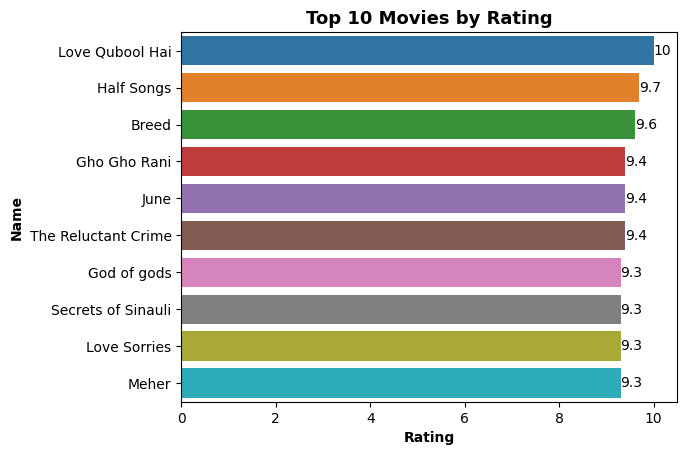

In [213]:
top10movie=df[['Name','Rating']].sort_values(by='Rating',ascending=False).head(10)
z=sns.barplot(y='Name',x='Rating',data=top10movie)
z.bar_label(z.containers[0])
plt.title('Top 10 Movies by Rating',fontsize=13,fontweight='bold')
plt.xlabel("Rating",fontsize=10,fontweight='bold')
plt.ylabel("Name",fontsize=10,fontweight='bold')

Text(0, 0.5, 'Directors')

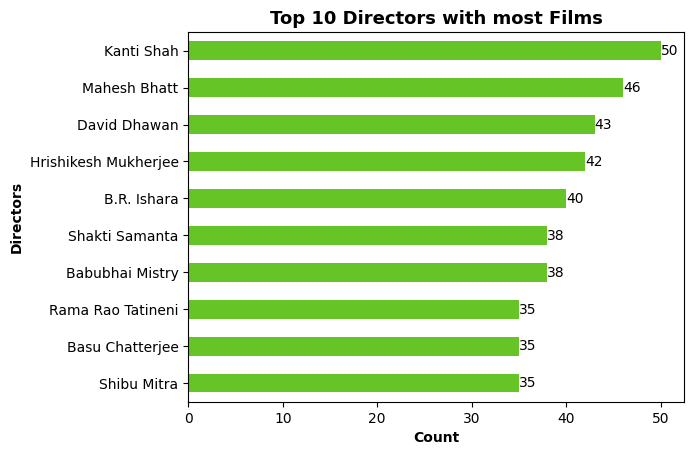

In [214]:
top_directors=df['Director'].value_counts().sort_values(ascending=False).head(10)
x=top_directors.sort_values().plot(kind='barh',color='#66c427')
x.bar_label(x.containers[0])
plt.title('Top 10 Directors with most Films',fontsize=13,fontweight='bold')
plt.xlabel("Count",fontsize=10,fontweight='bold')
plt.ylabel("Directors",fontsize=10,fontweight='bold')

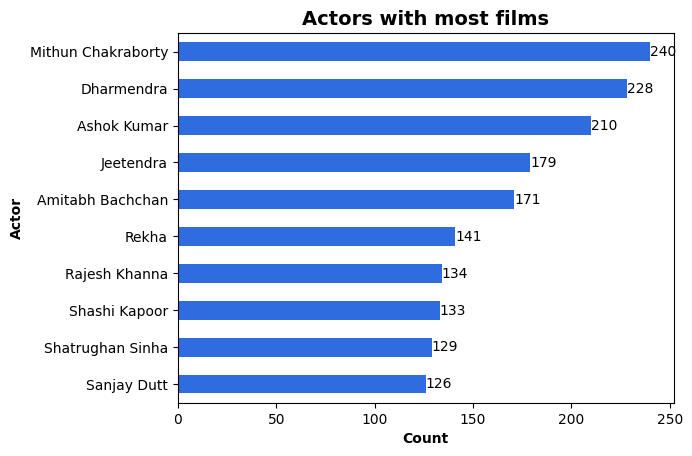

In [215]:
Actor1=df['Actor 1']
Actor2=df['Actor 2']
Actor3=df['Actor 3']
Actors=pd.concat([Actor1,Actor2,Actor3])
frequent_actor=Actors.value_counts().sort_values(ascending=False).head(10)
x=frequent_actor.sort_values().plot(kind='barh',color='#2f6cde')
x.bar_label(x.containers[0])
plt.title('Actors with most films',fontweight='bold',fontsize=14)
plt.xlabel('Count',fontweight='bold',fontsize=10)
plt.ylabel('Actor',fontweight='bold',fontsize=10)
plt.show()

Text(0, 0.5, 'Year')

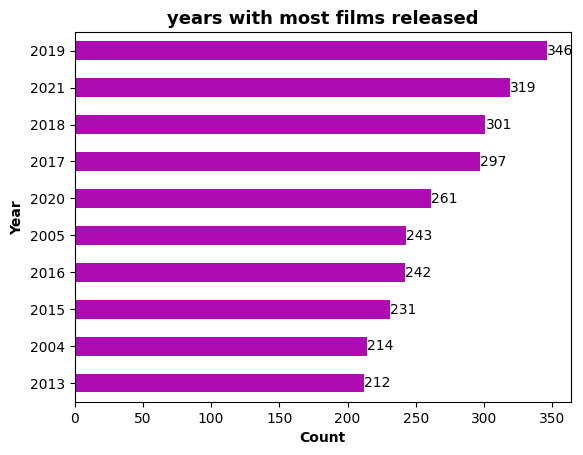

In [216]:
by_year=df['Year'].value_counts().sort_values(ascending=False).head(10)
y=by_year.sort_values(ascending=True).plot(kind='barh',color='#ad0cb3')
y.bar_label(y.containers[0])
plt.title('years with most films released',fontsize=13,fontweight='bold')
plt.xlabel("Count",fontsize=10,fontweight='bold')
plt.ylabel("Year",fontsize=10,fontweight='bold')

Text(0, 0.5, 'Genre')

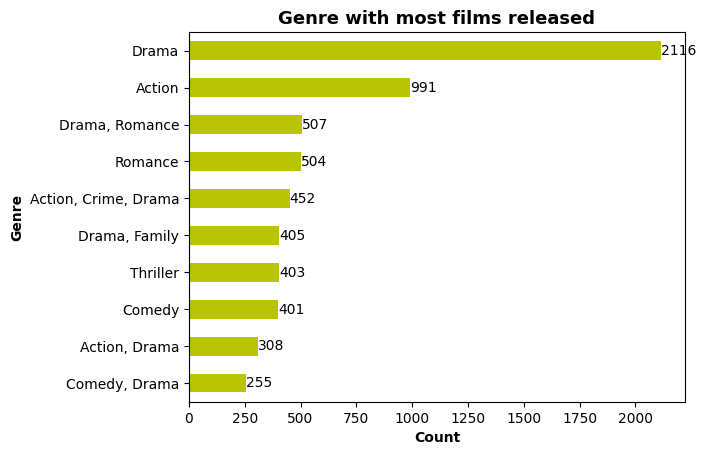

In [217]:
by_genre=df['Genre'].value_counts().sort_values(ascending=False).head(10)
y=by_genre.sort_values(ascending=True).plot(kind='barh',color='#b8c404')
y.bar_label(y.containers[0])
plt.title('Genre with most films released',fontsize=13,fontweight='bold')
plt.xlabel("Count",fontsize=10,fontweight='bold')
plt.ylabel("Genre",fontsize=10,fontweight='bold')

<Axes: >

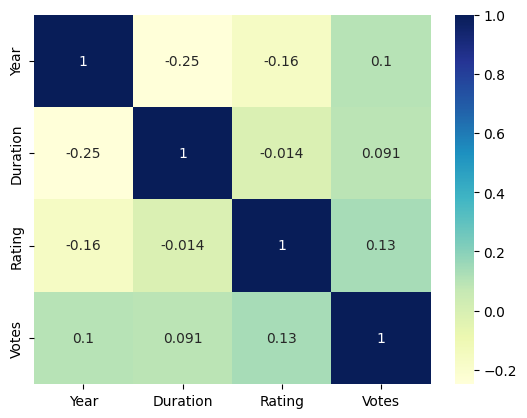

In [218]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Text(0.5, 0, 'Year')

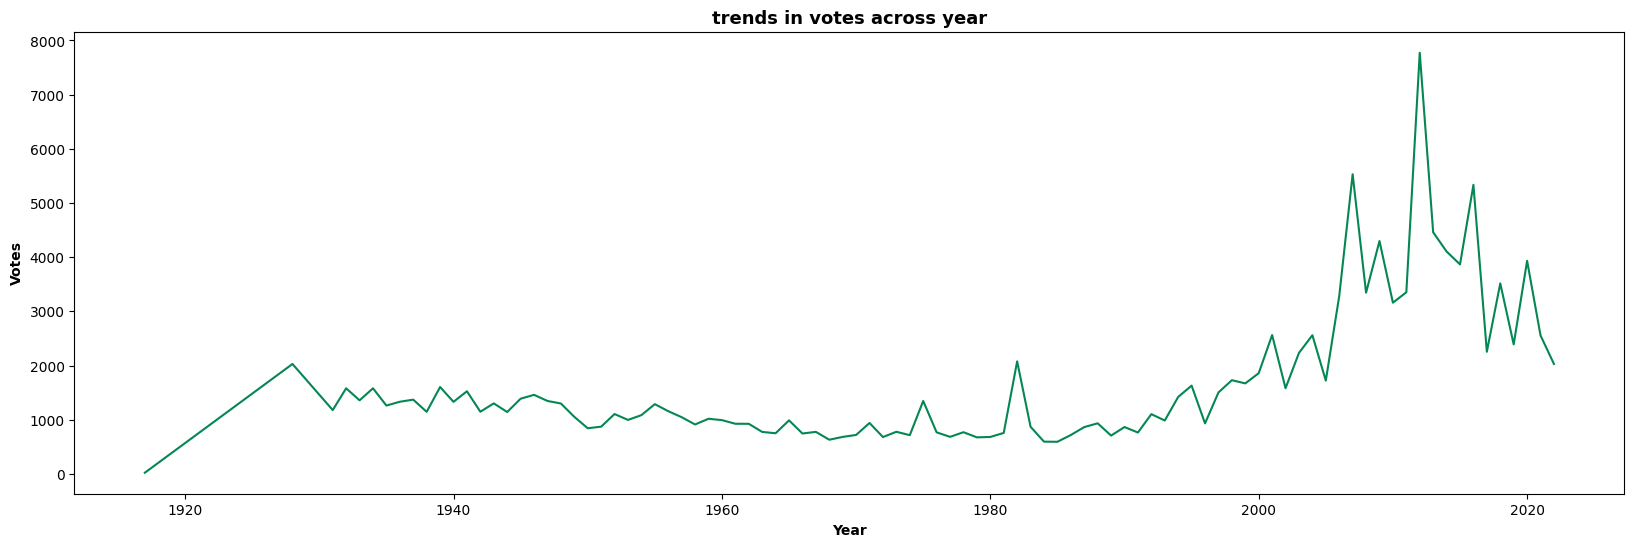

In [219]:
avg_rating_by_year=df.groupby('Year')['Votes'].mean().reset_index()
plt.figure(figsize=(20, 6))
sns.lineplot(y='Votes',x='Year',data=avg_rating_by_year,color='#048753')
plt.title('trends in votes across year',fontsize=13,fontweight='bold')
plt.ylabel("Votes",fontsize=10,fontweight='bold')
plt.xlabel("Year",fontsize=10,fontweight='bold')

Text(0.5, 0, 'Year')

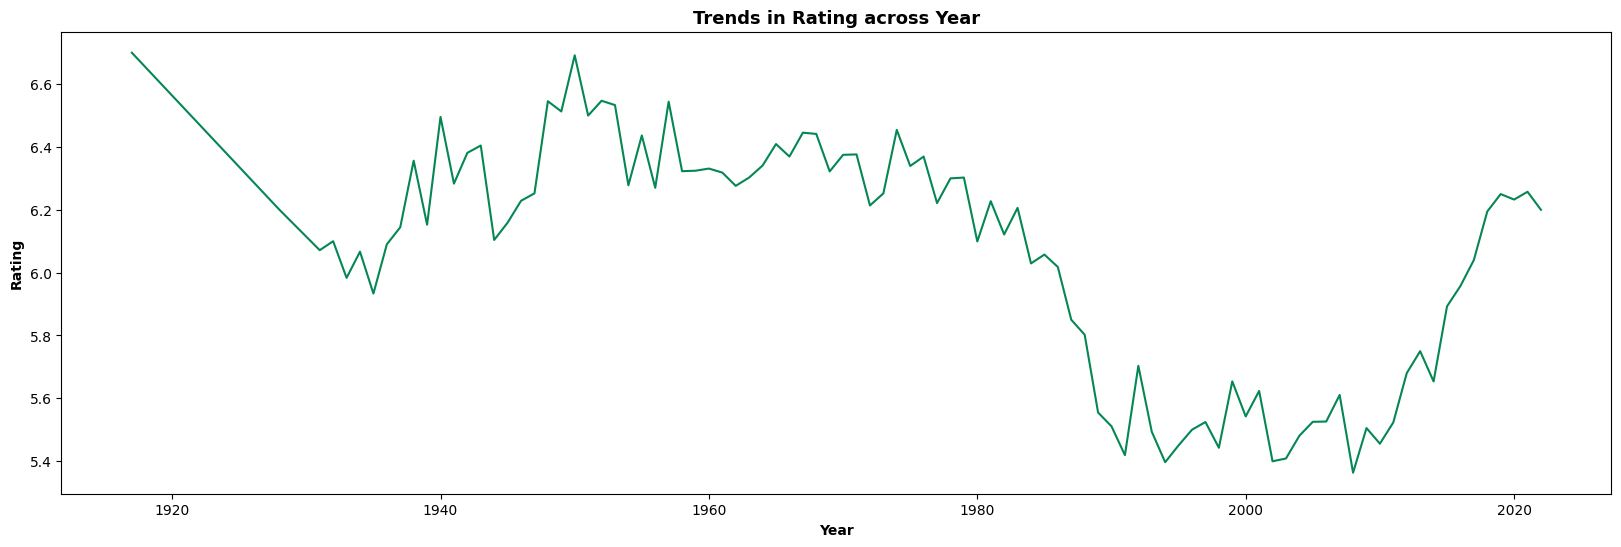

In [220]:
avg_rating_by_year=df.groupby('Year')['Rating'].mean().reset_index()
plt.figure(figsize=(20, 6))
sns.lineplot(y='Rating',x='Year',data=avg_rating_by_year,color='#048753')
plt.title('Trends in Rating across Year',fontsize=13,fontweight='bold')
plt.ylabel("Rating",fontsize=10,fontweight='bold')
plt.xlabel("Year",fontsize=10,fontweight='bold')


In [221]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Genre']=label.fit_transform(df['Genre'])

In [222]:
director_mean_rating=df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded']=director_mean_rating

actor1_mean_rating=df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded']=actor1_mean_rating

actor2_mean_rating=df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded']=actor2_mean_rating

actor3_mean_rating=df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded']=actor3_mean_rating


In [223]:
df.drop(['Name','Director','Actor 1','Actor 2','Actor 3'],axis=1,inplace=True)

In [224]:
x=df.drop(['Rating'],axis=1)
x

,Year,Duration,Genre,Votes,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,109.000000,272,8.000000,7.000000,6.850000,7.000000,7.000000
2,2021,90.000000,323,2028.856087,6.200000,6.600000,6.966667,6.200000
3,2019,110.000000,219,35.000000,4.400000,5.420000,4.400000,4.450000
4,2010,105.000000,272,2028.856087,6.314286,6.866667,5.844444,5.666667
5,1997,147.000000,188,827.000000,5.358824,4.788889,5.786667,5.853333
...,...,...,...,...,...,...,...,...
15502,1979,131.112818,0,2028.856087,6.125000,6.220000,6.233333,6.200000
15503,1989,125.000000,28,44.000000,5.885714,6.266667,6.066667,5.945455
15504,1988,131.112818,0,11.000000,4.075000,6.029167,3.700000,4.600000
15505,1999,129.000000,39,655.000000,5.225000,5.507059,4.645455,5.746667


In [225]:
y=df['Rating']
y

1        7.0
2        6.2
3        4.4
4        6.2
5        4.7
        ... 
15502    6.2
15503    5.8
15504    4.6
15505    4.5
15508    6.2
Name: Rating, Length: 11085, dtype: float64

In [226]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,Year,Duration,Genre,Votes,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
9179,1970,224.000000,182,4684.000000,7.145455,6.876471,6.811111,6.780000
9928,1996,148.000000,43,51.000000,5.200000,5.156757,4.966667,4.100000
14290,2009,115.000000,414,17.000000,6.400000,6.675000,6.600000,6.000000
13588,2014,90.000000,227,33.000000,5.900000,5.900000,5.900000,5.900000
791,1999,165.000000,423,11.000000,5.533333,5.600000,5.600000,6.080000
...,...,...,...,...,...,...,...,...
7860,2000,131.112818,272,2028.856087,6.016667,5.447059,5.940000,5.492063
7106,1973,131.000000,39,90.000000,5.900000,5.762143,5.708537,6.341379
7385,1991,121.000000,272,49.000000,6.850000,7.000000,6.900000,6.150000
1154,1978,131.112818,272,15.000000,5.720000,6.400000,6.200000,6.250000


In [227]:
x_test

,Year,Duration,Genre,Votes,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
7432,1987,131.112818,85,33.000000,5.234286,6.208333,5.983333,5.541176
5779,1985,147.000000,19,33.000000,5.664516,5.300714,5.727778,5.834211
13985,2019,112.000000,160,6373.000000,6.000000,5.518182,6.066667,5.533333
10669,1958,131.112818,286,2028.856087,6.200000,5.882353,6.200000,6.141667
9387,2005,105.000000,182,14.000000,6.900000,7.600000,7.250000,7.600000
...,...,...,...,...,...,...,...,...
3571,1955,131.112818,272,2028.856087,6.157895,6.246154,5.180000,6.233333
5730,1977,125.000000,345,14.000000,6.580000,6.400000,6.735484,6.161905
5628,2003,131.112818,272,2028.856087,6.200000,6.200000,6.633333,6.500000
9672,2003,156.000000,182,75813.000000,8.060000,5.156757,5.991667,7.000000


In [228]:
y_train

9179     8.0
9928     4.1
14290    5.2
13588    5.9
791      5.6
        ... 
7860     6.2
7106     6.0
7385     7.0
1154     6.5
10027    6.6
Name: Rating, Length: 7759, dtype: float64

In [229]:
y_test

7432     6.4
5779     4.7
13985    6.0
10669    6.2
9387     7.6
        ... 
3571     6.2
5730     5.9
5628     6.2
9672     8.1
13121    7.5
Name: Rating, Length: 3326, dtype: float64

In [230]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[-9.97156960e-01,  4.59018760e+00, -2.26384372e-01, ...,
         1.15337300e+00,  1.07648614e+00,  1.04145716e+00],
       [ 1.99286680e-01,  8.38115436e-01, -1.22771222e+00, ...,
        -9.51236590e-01, -1.18665246e+00, -2.23902016e+00],
       [ 7.97508501e-01, -7.91073791e-01,  1.44489664e+00, ...,
         9.06810510e-01,  8.17452208e-01,  8.66913737e-02],
       ...,
       [-3.07986350e-02, -4.94857568e-01,  4.21957400e-01, ...,
         1.30455001e+00,  1.18555307e+00,  2.70300179e-01],
       [-6.29020455e-01,  4.40589700e-03,  4.21957400e-01, ...,
         5.70261703e-01,  3.26651063e-01,  3.92706049e-01],
       [-1.82546410e+00,  4.40589700e-03,  5.22810564e-01, ...,
         5.70261703e-01,  2.25105999e-01,  6.75769624e-01]])

In [231]:
y_train

9179     8.0
9928     4.1
14290    5.2
13588    5.9
791      5.6
        ... 
7860     6.2
7106     6.0
7385     7.0
1154     6.5
10027    6.6
Name: Rating, Length: 7759, dtype: float64

In [232]:
# using LinearRegression
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred1

array([5.54758902, 5.51589987, 5.73318705, ..., 6.5617176 , 7.76579824,
       6.10976957])

In [233]:
# Using a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

array([5.422, 4.836, 6.473, ..., 6.48 , 7.59 , 5.866])

In [234]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

print('Linear Regression Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test,y_pred1))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred1))
print('R2 score: ',r2_score(y_test,y_pred1))
print()

print('Random Forest Regressor Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test,y_pred2))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred2))
print('R2 score: ',r2_score(y_test,y_pred2))

Linear Regression Model Performance: 
Mean squared error:  0.3747370805419403
Mean absolute error:  0.43418918619995617
R2 score:  0.7080290976032659

Random Forest Regressor Model Performance: 
Mean squared error:  0.33984453668069753
Mean absolute error:  0.39133884546001196
R2 score:  0.7352151116036725
